<small><i>June 2016 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and [license](./LICENSE.txt) info are in the folder.</i></small>

# Unsupervised learning

+ Autoencoders
+ Pretraining
+ Manifold learning
+ Sparse coding

# Autoencoders

In [2]:
!pip install tqdm

    100% |████████████████████████████████| 51kB 3.6MB/s 


In [1]:
%reset
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.reset_default_graph() 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# Network Parameters
n_input = 64
n_hidden_1 = 64  # 1st layer num features
n_hidden_2 = 32  # 2nd layer num features
n_hidden_3 = 10  # 3rd layer num features
n_hidden_4 = 10  # 4th layer num features
n_hidden_5 = 32  # 5th layer num features
n_hidden_6 = 64  # 6th layer num features

# Parameters
learning_rate = 1e-3

In [4]:
# Graph inputs
x = tf.placeholder("float", [None, n_input], name='x')
y = tf.placeholder("float", [None, n_input], name='y')

keep_prob = tf.placeholder(tf.float32) #Input parameter: dropout probability

# Store layers weight & bias
c = 0.1 
weights = {
    'h1': tf.Variable(c*tf.random_normal([n_input, n_hidden_1]), name='W1'),
    'h2': tf.Variable(c*tf.random_normal([n_hidden_1, n_hidden_2]), name='W2'),
    'h3': tf.Variable(c*tf.random_normal([n_hidden_2, n_hidden_3]), name='W3'),
    'h4': tf.Variable(c*tf.random_normal([n_hidden_3, n_hidden_4]), name='W4'),
    'h5': tf.Variable(c*tf.random_normal([n_hidden_4, n_hidden_5]), name='W5'),
    'h6': tf.Variable(c*tf.random_normal([n_hidden_5, n_hidden_6]), name='W6'),
    'out': tf.Variable(c*tf.random_normal([n_hidden_6, n_input]))
}
biases = {
    'b1': tf.Variable(c*tf.random_normal([n_hidden_1]), name='b1'),
    'b2': tf.Variable(c*tf.random_normal([n_hidden_2]), name='b2'),
    'b3': tf.Variable(c*tf.random_normal([n_hidden_3]), name='b3'),
    'b4': tf.Variable(c*tf.random_normal([n_hidden_4]), name='b4'),
    'b5': tf.Variable(c*tf.random_normal([n_hidden_5]), name='b5'),
    'b6': tf.Variable(c*tf.random_normal([n_hidden_6]), name='b6'),
    'out': tf.Variable(c*tf.random_normal([n_input]))
}


pre_layer_drop = tf.nn.dropout(x, keep_prob)
layer_1 = tf.nn.relu(tf.add(tf.matmul(pre_layer_drop, weights['h1']), biases['b1']))
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['h3']), biases['b3']))
layer_4 = tf.nn.relu(tf.add(tf.matmul(layer_3, weights['h4']), biases['b4']))
layer_5 = tf.nn.relu(tf.add(tf.matmul(layer_4, weights['h5']), biases['b5']))
layer_6 = tf.nn.relu(tf.add(tf.matmul(layer_5, weights['h6']), biases['b6']))
output = tf.add(tf.matmul(layer_6, weights['out']), biases['out'])

In [5]:
#Reconstruction loss
loss = tf.reduce_mean(tf.pow(output - y, 2))

In [6]:
#Optimizer
opt = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [9]:
init = tf.global_variables_initializer()

In [10]:
# Load data
from sklearn.datasets import load_digits
data = load_digits()

idx = np.random.permutation(data.data.shape[0])
idx_train = idx[:-100]
idx_test = idx[-100:]

train = data.data[idx_train,:]
test = data.data[idx_test,:]

In [12]:
sess = tf.Session()
sess.run(init)

import tqdm
training_epochs = 100000
display_step = 50

# Training cycle
cost = []
batch_size=16
for epoch in tqdm.tqdm(xrange(training_epochs)):
    xs = train[np.random.randint(0,train.shape[0],batch_size),:]/16.
    sess.run(opt, feed_dict={x: xs, y: xs, keep_prob: 0.8})
    if epoch % display_step == 1:
        cost.append(sess.run(loss, feed_dict={x: xs, y: xs, keep_prob: 1.}))

print "Optimization Finished!"

100%|██████████| 100000/100000 [01:35<00:00, 1043.48it/s]

Optimization Finished!


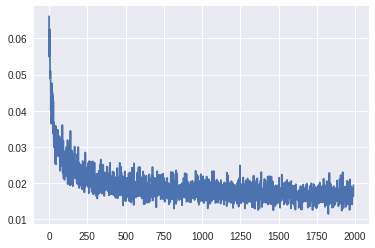

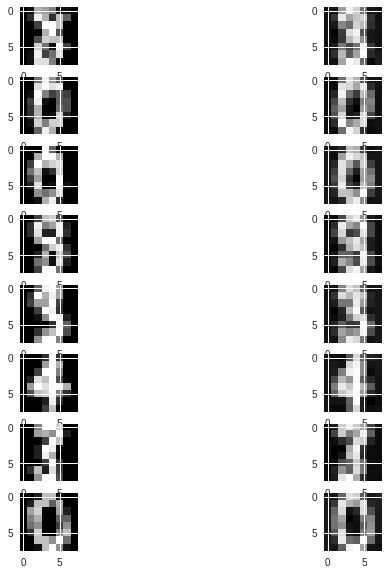

In [13]:
import matplotlib.pyplot as plt
plt.plot(cost[10:])
plt.show()

N = 8
xs = test[np.random.randint(0,test.shape[0],N),:]/16.
rec = sess.run(output, feed_dict={x: xs, keep_prob: 1.})

%matplotlib inline
import matplotlib.pyplot as plt
f, axarr = plt.subplots(N, 2)
for i in xrange(N):
        axarr[i,0].imshow(xs[i].reshape((8,8)),cmap='gray', interpolation='nearest')
        axarr[i,1].imshow(rec[i].reshape((8,8)),cmap='gray', interpolation='nearest')

f.set_size_inches(10,10) 

In [50]:
!ls -l 

total 1756
-rw-r--r-- 1 root root 162531 Jun 13 21:23 autoencoder_digits_part1_autoencoder (1).ckpt
-rw-r--r-- 1 root root 162531 Jun 13 21:32 autoencoder_digits_part1_autoencoder (2).ckpt
-rw-r--r-- 1 root root 162531 Jun 13 21:44 autoencoder_digits_part1_autoencoder (3).ckpt
-rw-r--r-- 1 root root 162531 Jun 13 21:45 autoencoder_digits_part1_autoencoder (4).ckpt
-rw-r--r-- 1 root root 162531 Jun 13 21:51 autoencoder_digits_part1_autoencoder (5).ckpt
-rw-r--r-- 1 root root 162531 Jun 13 21:22 autoencoder_digits_part1_autoencoder.ckpt
drwxr-xr-x 1 root root   4096 May 21 17:02 datalab
-rw-r--r-- 1 root root  55743 Jun 13 21:51 digits_idx_part1_autoencoder (10).pkl
-rw-r--r-- 1 root root  55743 Jun 13 21:57 digits_idx_part1_autoencoder (11).pkl
-rw-r--r-- 1 root root  55743 Jun 13 21:18 digits_idx_part1_autoencoder (1).pkl
-rw-r--r-- 1 root root  55743 Jun 13 21:19 digits_idx_part1_autoencoder (2).pkl
-rw-r--r-- 1 root root  55743 Jun 13 21:19 digits_idx_part1_autoencoder (3).pkl
-rw-r-

# Check reconstruction

In [60]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph() 
# Network Parameters
n_input = 64
n_hidden_1 = 64  # 1st layer num features
n_hidden_2 = 32  # 2nd layer num features
n_hidden_3 = 10  # 3nd layer num features
n_hidden_4 = 10  # 4nd layer num features
n_hidden_5 = 32  # 4nd layer num features
n_hidden_6 = 64  # 1st layer num features



# Parameters
learning_rate = 1e-3
# tf Graph input
x = tf.placeholder("float", [None, n_input], name='x')
y = tf.placeholder("float", [None, n_input], name='y')
# Store layers weight & bias
c = 0.1
weights = {
    'h1': tf.Variable(c*tf.random_normal([n_input, n_hidden_1]), name='W1'),
    'h2': tf.Variable(c*tf.random_normal([n_hidden_1, n_hidden_2]), name='W2'),
    'h3': tf.Variable(c*tf.random_normal([n_hidden_2, n_hidden_3]), name='W3'),
    'h4': tf.Variable(c*tf.random_normal([n_hidden_3, n_hidden_4]), name='W4'),
    'h5': tf.Variable(c*tf.random_normal([n_hidden_4, n_hidden_5]), name='W5'),
    'h6': tf.Variable(c*tf.random_normal([n_hidden_5, n_hidden_6]), name='W6'),
    'out': tf.Variable(c*tf.random_normal([n_hidden_6, n_input]))
}
biases = {
    'b1': tf.Variable(c*tf.random_normal([n_hidden_1]), name='b1'),
    'b2': tf.Variable(c*tf.random_normal([n_hidden_2]), name='b2'),
    'b3': tf.Variable(c*tf.random_normal([n_hidden_3]), name='b3'),
    'b4': tf.Variable(c*tf.random_normal([n_hidden_4]), name='b4'),
    'b5': tf.Variable(c*tf.random_normal([n_hidden_5]), name='b5'),
    'b6': tf.Variable(c*tf.random_normal([n_hidden_6]), name='b6'),
    'out': tf.Variable(c*tf.random_normal([n_input]))
}

keep_prob = tf.placeholder(tf.float32)
pre_layer_drop = tf.nn.dropout(x, keep_prob)
layer_1 = tf.nn.relu(tf.add(tf.matmul(pre_layer_drop, weights['h1']), biases['b1']))
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['h3']), biases['b3']))
layer_4 = tf.nn.relu(tf.add(tf.matmul(layer_3, weights['h4']), biases['b4']))
layer_5 = tf.nn.relu(tf.add(tf.matmul(layer_4, weights['h5']), biases['b5']))
layer_6 = tf.nn.relu(tf.add(tf.matmul(layer_5, weights['h6']), biases['b6']))
output = tf.add(tf.matmul(layer_6, weights['out']), biases['out'])

loss = tf.reduce_mean(tf.pow(output - y, 2))
opt = tf.train.AdamOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

import tqdm
training_epochs = 100000
display_step = 50

from sklearn.datasets import load_digits
data = load_digits()

import pickle


from google.colab import files
print "Upload file ... digits_idx_part1_autoencoder.pkl"
uploaded = files.upload()
import io
idx_train,idx_test = pickle.load(io.StringIO(uploaded['digits_idx_part1_autoencoder.pkl'].decode('utf-8')))

train = data.data[idx_train,:]
test = data.data[idx_test,:]


sess = tf.Session()
sess.run(init)

print "Upload file ... autoencoder_digits_part1_autoencoder.ckpt"
uploaded = files.upload()
saver.restore(sess, "autoencoder_digits_part1_autoencoder.ckpt")
print("Model restored.")

N = 8
xs = test[np.random.randint(0,test.shape[0],N),:]/16.
rec = sess.run(output, feed_dict={x: xs, keep_prob: 1.})

%matplotlib inline
import matplotlib.pyplot as plt
f, axarr = plt.subplots(N, 2)
for i in xrange(N):
        axarr[i,0].imshow(xs[i].reshape((8,8)),cmap='gray', interpolation='nearest')
        axarr[i,1].imshow(rec[i].reshape((8,8)),cmap='gray', interpolation='nearest')

f.set_size_inches(10,10) 


Upload file ... digits_idx_part1_autoencoder.pkl


TypeError: ignored

# Learning representations and pretraining

In [64]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph() 
# Network Parameters
n_input = 64
n_hidden_1 = 64  # 1st layer num features
n_hidden_2 = 32  # 2nd layer num features
n_hidden_3 = 10  # 3rd layer num features
n_hidden_4 = 10  # 4th layer num features
n_hidden_5 = 32  # 5th layer num features
n_hidden_6 = 64  # 6th layer num features



# Parameters
learning_rate = 1e-3
# tf Graph input
x = tf.placeholder("float", [None, n_input], name='x')
y = tf.placeholder("float", [None, n_input], name='y')
# Store layers weight & bias
c = 0.1
weights = {
    'h1': tf.Variable(c*tf.random_normal([n_input, n_hidden_1]), name='W1'),
    'h2': tf.Variable(c*tf.random_normal([n_hidden_1, n_hidden_2]), name='W2'),
    'h3': tf.Variable(c*tf.random_normal([n_hidden_2, n_hidden_3]), name='W3'),
    'h4': tf.Variable(c*tf.random_normal([n_hidden_3, n_hidden_4]), name='W4'),
    'h5': tf.Variable(c*tf.random_normal([n_hidden_4, n_hidden_5]), name='W5'),
    'h6': tf.Variable(c*tf.random_normal([n_hidden_5, n_hidden_6]), name='W6'),
    'out': tf.Variable(c*tf.random_normal([n_hidden_6, n_input]))
}
biases = {
    'b1': tf.Variable(c*tf.random_normal([n_hidden_1]), name='b1'),
    'b2': tf.Variable(c*tf.random_normal([n_hidden_2]), name='b2'),
    'b3': tf.Variable(c*tf.random_normal([n_hidden_3]), name='b3'),
    'b4': tf.Variable(c*tf.random_normal([n_hidden_4]), name='b4'),
    'b5': tf.Variable(c*tf.random_normal([n_hidden_5]), name='b5'),
    'b6': tf.Variable(c*tf.random_normal([n_hidden_6]), name='b6'),
    'out': tf.Variable(c*tf.random_normal([n_input]))
}

keep_prob = tf.placeholder(tf.float32)
pre_layer_drop = tf.nn.dropout(x, keep_prob)
layer_1 = tf.nn.relu(tf.add(tf.matmul(pre_layer_drop, weights['h1']), biases['b1']))
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['h3']), biases['b3']))
layer_4 = tf.nn.relu(tf.add(tf.matmul(layer_3, weights['h4']), biases['b4']))
layer_5 = tf.nn.relu(tf.add(tf.matmul(layer_4, weights['h5']), biases['b5']))
layer_6 = tf.nn.relu(tf.add(tf.matmul(layer_5, weights['h6']), biases['b6']))
output = tf.add(tf.matmul(layer_6, weights['out']), biases['out'])

loss = tf.reduce_mean(tf.pow(output - y, 2))
opt = tf.train.AdamOptimizer(learning_rate).minimize(loss)

init = tf.initialize_all_variables()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

import tqdm
training_epochs = 100000
display_step = 50

from sklearn.datasets import load_digits
data = load_digits()

from google.colab import files
print "Upload file ... digits_idx_part1_autoencoder.pkl"
uploaded = files.upload()
import io
idx_train,idx_test = pickle.load(io.StringIO(uploaded['digits_idx_part1_autoencoder.pkl'].decode('utf-8')))


train = data.data[idx_train,:]/16.
test = data.data[idx_test,:]/16.
train_y = data.target[idx_train]
test_y = data.target[idx_test]



Upload file ... digits_idx_part1_autoencoder.pkl


Saving digits_idx_part1_autoencoder.pkl to digits_idx_part1_autoencoder (12).pkl


In [65]:

sess = tf.Session()
sess.run(init)

saver.restore(sess, "autoencoder_digits_part1_autoencoder.ckpt")
print("Model restored.")

code = sess.run(layer_3, feed_dict={x: train, keep_prob: 1.})

INFO:tensorflow:Restoring parameters from autoencoder_digits_part1_autoencoder.ckpt
Model restored.


In [66]:
code.shape

(1697, 10)

In [67]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(3,random_state=0)
clf.fit(code,train_y)

clf2 = RandomForestClassifier(3,random_state=0)
clf2.fit(train,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [68]:
code = sess.run(layer_3, feed_dict={x: test, keep_prob: 1.})
print clf.score(code,test_y)
print clf2.score(test,test_y)

0.88
0.85


# Sparse coding

In [70]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()
# Network Parameters
n_input = 64
n_hidden_1 = 64  # 1st layer num features
n_hidden_2 = 128  # 2nd layer num features
n_hidden_3 = 256  # 3nd layer num features
n_hidden_4 = 256  # 4nd layer num features
n_hidden_5 = 128  # 4nd layer num features
n_hidden_6 = 64  # 1st layer num features



# Parameters
learning_rate = 1e-3
# tf Graph input
x = tf.placeholder("float", [None, n_input], name='x')
y = tf.placeholder("float", [None, n_input], name='y')
lmd = tf.placeholder("float",[], name = 'lambda')
# Store layers weight & bias
c = 0.1
weights = {
    'h1': tf.Variable(c*tf.random_normal([n_input, n_hidden_1]), name='W1'),
    'h2': tf.Variable(c*tf.random_normal([n_hidden_1, n_hidden_2]), name='W2'),
    'h3': tf.Variable(c*tf.random_normal([n_hidden_2, n_hidden_3]), name='W3'),
    'h4': tf.Variable(c*tf.random_normal([n_hidden_3, n_hidden_4]), name='W4'),
    'h5': tf.Variable(c*tf.random_normal([n_hidden_4, n_hidden_5]), name='W5'),
    'h6': tf.Variable(c*tf.random_normal([n_hidden_5, n_hidden_6]), name='W6'),
    'out': tf.Variable(c*tf.random_normal([n_hidden_6, n_input]))
}
biases = {
    'b1': tf.Variable(c*tf.random_normal([n_hidden_1]), name='b1'),
    'b2': tf.Variable(c*tf.random_normal([n_hidden_2]), name='b2'),
    'b3': tf.Variable(c*tf.random_normal([n_hidden_3]), name='b3'),
    'b4': tf.Variable(c*tf.random_normal([n_hidden_4]), name='b4'),
    'b5': tf.Variable(c*tf.random_normal([n_hidden_5]), name='b5'),
    'b6': tf.Variable(c*tf.random_normal([n_hidden_6]), name='b6'),
    'out': tf.Variable(c*tf.random_normal([n_input]))
}

keep_prob = tf.placeholder(tf.float32)
pre_layer_drop = tf.nn.dropout(x, keep_prob)
layer_1 = tf.nn.relu(tf.add(tf.matmul(pre_layer_drop, weights['h1']), biases['b1']))
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['h3']), biases['b3']))
layer_4 = tf.nn.relu(tf.add(tf.matmul(layer_3, weights['h4']), biases['b4']))
layer_5 = tf.nn.relu(tf.add(tf.matmul(layer_4, weights['h5']), biases['b5']))
layer_6 = tf.nn.relu(tf.add(tf.matmul(layer_5, weights['h6']), biases['b6']))
output = tf.add(tf.matmul(layer_6, weights['out']), biases['out'])

loss = tf.reduce_mean(tf.pow(output - y, 2))
loss2 = tf.reduce_mean(tf.abs(layer_3))
floss = loss + lmd * loss2

opt = tf.train.AdamOptimizer(learning_rate).minimize(floss)

init = tf.initialize_all_variables()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

import tqdm
training_epochs = 100000
display_step = 50

from sklearn.datasets import load_digits
data = load_digits()

idx = np.random.permutation(data.data.shape[0])
idx_train = idx[:-100]
idx_test = idx[-100:]

from google.colab import files
print "Upload file ... digits_idx_part2_sparse.pkl"
uploaded = files.upload()
import io
idx_train,idx_test = pickle.load(io.StringIO(uploaded['digits_idx_part2_sparse.pkl'].decode('utf-8')))


train = data.data[idx_train,:]
test = data.data[idx_test,:]


sess = tf.Session()
sess.run(init)
print "Upload file ... autoencoder_digits_part2_sparse.ckpt"
uploaded = files.upload()
saver.restore(sess, "autoencoder_digits_part2_sparse.ckpt")
print("Model restored.")


Upload file ... digits_idx_part2_sparse.pkl


Saving digits_idx_part2_sparse.pkl to digits_idx_part2_sparse.pkl
Upload file ... autoencoder_digits_part2_sparse.ckpt


Saving autoencoder_digits_part2_sparse.ckpt to autoencoder_digits_part2_sparse.ckpt
INFO:tensorflow:Restoring parameters from autoencoder_digits_part2_sparse.ckpt
Model restored.


In [71]:
code = sess.run(layer_3, feed_dict={x: train, keep_prob: 1.})

In [72]:
code[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 2.3674152 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.46560624, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.09887764,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [73]:
non_zero=[]
for i in xrange(code.shape[0]):
    non_zero.append(len(np.where(code[i]>1e-6)[0]))

(array([ 21., 256., 605., 464., 131., 141.,  55.,  19.,   2.,   3.]),
 array([ 3. ,  4.8,  6.6,  8.4, 10.2, 12. , 13.8, 15.6, 17.4, 19.2, 21. ]),
 <a list of 10 Patch objects>)

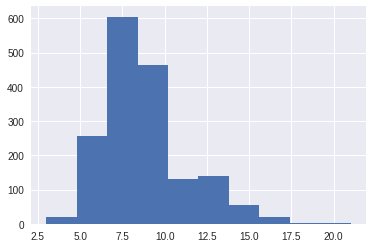

In [74]:
# Histogram of coded values
plt.hist(non_zero)

In [75]:
code = sess.run(layer_3, feed_dict={x: test, keep_prob: 1.})

In [76]:
code

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.64484525, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

## From compressed to restored

In [77]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()
# Network Parameters
n_input = 64
n_hidden_1 = 64  # 1st layer num features
n_hidden_2 = 128  # 2nd layer num features
n_hidden_3 = 256  # 3nd layer num features
n_hidden_4 = 256  # 4nd layer num features
n_hidden_5 = 128  # 4nd layer num features
n_hidden_6 = 64  # 1st layer num features



# Parameters
learning_rate = 1e-3
# tf Graph input
x = tf.placeholder("float", [None, n_input], name='x')
y = tf.placeholder("float", [None, n_input], name='y')
lmd = tf.placeholder("float",[], name = 'lambda')
# Store layers weight & bias
c = 0.1
weights = {
    'h1': tf.Variable(c*tf.random_normal([n_input, n_hidden_1]), name='W1'),
    'h2': tf.Variable(c*tf.random_normal([n_hidden_1, n_hidden_2]), name='W2'),
    'h3': tf.Variable(c*tf.random_normal([n_hidden_2, n_hidden_3]), name='W3'),
    'h4': tf.Variable(c*tf.random_normal([n_hidden_3, n_hidden_4]), name='W4'),
    'h5': tf.Variable(c*tf.random_normal([n_hidden_4, n_hidden_5]), name='W5'),
    'h6': tf.Variable(c*tf.random_normal([n_hidden_5, n_hidden_6]), name='W6'),
    'out': tf.Variable(c*tf.random_normal([n_hidden_6, n_input]))
}
biases = {
    'b1': tf.Variable(c*tf.random_normal([n_hidden_1]), name='b1'),
    'b2': tf.Variable(c*tf.random_normal([n_hidden_2]), name='b2'),
    'b3': tf.Variable(c*tf.random_normal([n_hidden_3]), name='b3'),
    'b4': tf.Variable(c*tf.random_normal([n_hidden_4]), name='b4'),
    'b5': tf.Variable(c*tf.random_normal([n_hidden_5]), name='b5'),
    'b6': tf.Variable(c*tf.random_normal([n_hidden_6]), name='b6'),
    'out': tf.Variable(c*tf.random_normal([n_input]))
}

keep_prob = tf.placeholder(tf.float32)
pre_layer_drop = tf.nn.dropout(x, keep_prob)
layer_1 = tf.nn.relu(tf.add(tf.matmul(pre_layer_drop, weights['h1']), biases['b1']))
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['h3']), biases['b3']))
layer_4 = tf.nn.relu(tf.add(tf.matmul(layer_3, weights['h4']), biases['b4']))
layer_5 = tf.nn.relu(tf.add(tf.matmul(layer_4, weights['h5']), biases['b5']))
layer_6 = tf.nn.relu(tf.add(tf.matmul(layer_5, weights['h6']), biases['b6']))
output = tf.add(tf.matmul(layer_6, weights['out']), biases['out'])

loss = tf.reduce_mean(tf.pow(output - y, 2))
loss2 = tf.reduce_mean(tf.abs(layer_3))
floss = loss + lmd * loss2

opt = tf.train.AdamOptimizer(learning_rate).minimize(floss)



#################################### Decoder 
x_code = tf.placeholder("float", [None, n_hidden_4], name='x')


dec_layer_1 = tf.nn.relu(tf.add(tf.matmul(x_code, weights['h4']), biases['b4']))
dec_layer_2 = tf.nn.relu(tf.add(tf.matmul(dec_layer_1, weights['h5']), biases['b5']))
dec_layer_3 = tf.nn.relu(tf.add(tf.matmul(dec_layer_2, weights['h6']), biases['b6']))
dec_output = tf.add(tf.matmul(dec_layer_3, weights['out']), biases['out'])
#############################################


init = tf.initialize_all_variables()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

from sklearn.datasets import load_digits
data = load_digits()

idx = np.random.permutation(data.data.shape[0])
idx_train = idx[:-100]
idx_test = idx[-100:]

import pickle
from google.colab import files
print "Upload file ... digits_idx_part2_sparse.pkl"
uploaded = files.upload()
import io
idx_train,idx_test = pickle.load(io.StringIO(uploaded['digits_idx_part2_sparse.pkl'].decode('utf-8')))

train = data.data[idx_train,:]/16.
test = data.data[idx_test,:]/16.


sess = tf.Session()
sess.run(init)

saver.restore(sess, "autoencoder_digits_part2_sparse.ckpt")
print("Model restored.")

Upload file ... digits_idx_part2_sparse.pkl


Saving digits_idx_part2_sparse.pkl to digits_idx_part2_sparse (1).pkl
INFO:tensorflow:Restoring parameters from autoencoder_digits_part2_sparse.ckpt
Model restored.


In [78]:
code = sess.run(layer_3, feed_dict={x: test, keep_prob: 1.})

In [79]:
res = sess.run(dec_output, feed_dict={x_code: code})

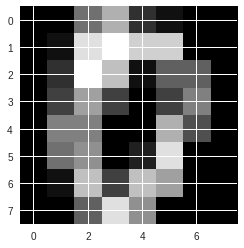

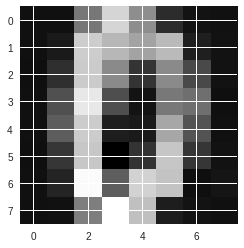

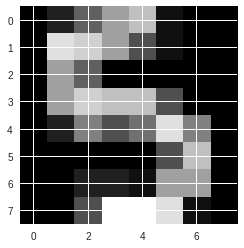

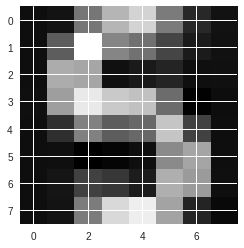

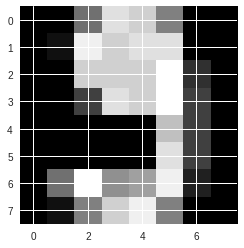

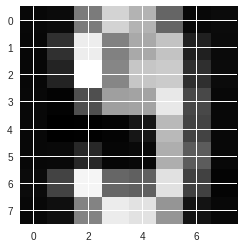

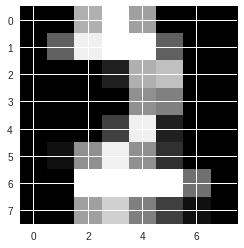

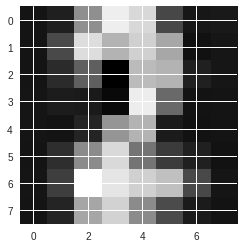

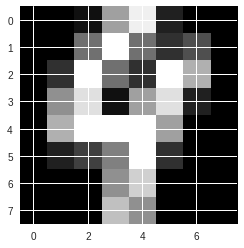

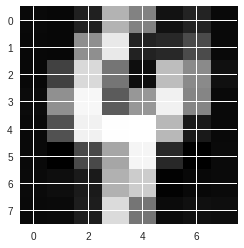

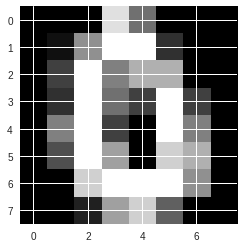

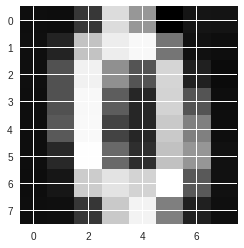

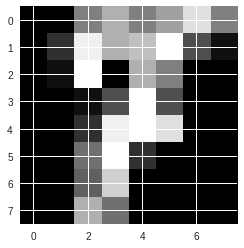

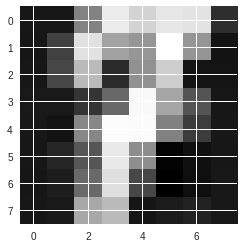

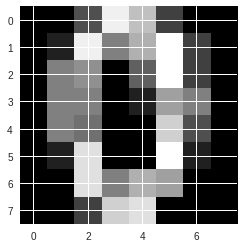

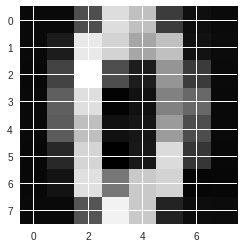

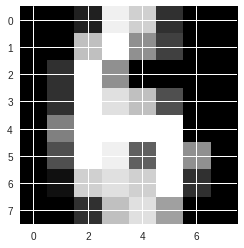

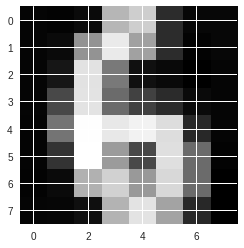

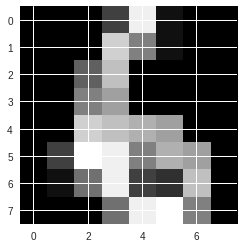

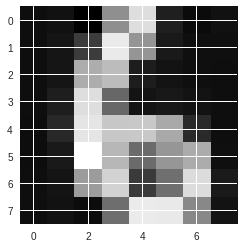

In [80]:
for i in xrange(10):

    plt.figure()
    plt.imshow(test[i].reshape((8,8)),cmap='gray',interpolation='nearest')
    plt.figure()
    plt.imshow(res[i].reshape((8,8)),cmap='gray',interpolation='nearest')

# Manifold learning

Upload file ... digits_idx_part3_viz.pkl


Saving digits_idx_part3_viz.pkl to digits_idx_part3_viz (1).pkl
Upload file ... autoencoder_digits_part3_viz.ckpt


Saving autoencoder_digits_part3_viz.ckpt to autoencoder_digits_part3_viz (1).ckpt
INFO:tensorflow:Restoring parameters from autoencoder_digits_part3_viz.ckpt
Model restored.


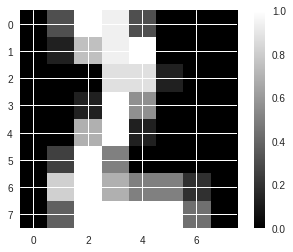

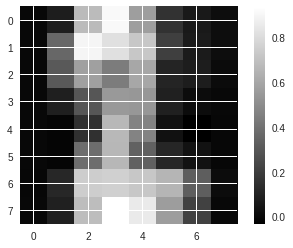

In [83]:
%matplotlib inline
import tensorflow as tf
import numpy as np

tf.reset_default_graph()
# Network Parameters
n_input = 64
n_hidden_1 = 32  # 1st layer num features
n_hidden_2 = 16  # 2nd layer num features
n_hidden_3 = 2  # 3nd layer num features
n_hidden_4 = 2  # 4nd layer num features
n_hidden_5 = 16 # 4nd layer num features
n_hidden_6 = 32  # 1st layer num features



# Parameters
lr = 1e-3
lr_decay_step = 100000
lr_decay_factor = 0.5
training_epochs = 50000
display_step = 100
batch_size=16
# tf Graph input
x = tf.placeholder("float", [None, n_input], name='x')
y = tf.placeholder("float", [None, n_input], name='y')
learning_rate = tf.placeholder(tf.float32, [], name='learning_rate')

# Store layers weight & bias
c = 0.1
weights = {
    'h1': tf.Variable(c*tf.random_normal([n_input, n_hidden_1]), name='W1'),
    'h2': tf.Variable(c*tf.random_normal([n_hidden_1, n_hidden_2]), name='W2'),
    'h3': tf.Variable(c*tf.random_normal([n_hidden_2, n_hidden_3]), name='W3'),
    'h4': tf.Variable(c*tf.random_normal([n_hidden_3, n_hidden_4]), name='W4'),
    'h5': tf.Variable(c*tf.random_normal([n_hidden_4, n_hidden_5]), name='W5'),
    'h6': tf.Variable(c*tf.random_normal([n_hidden_5, n_hidden_6]), name='W6'),
    'out': tf.Variable(c*tf.random_normal([n_hidden_6, n_input]))
}
biases = {
    'b1': tf.Variable(c*tf.random_normal([n_hidden_1]), name='b1'),
    'b2': tf.Variable(c*tf.random_normal([n_hidden_2]), name='b2'),
    'b3': tf.Variable(c*tf.random_normal([n_hidden_3]), name='b3'),
    'b4': tf.Variable(c*tf.random_normal([n_hidden_4]), name='b4'),
    'b5': tf.Variable(c*tf.random_normal([n_hidden_5]), name='b5'),
    'b6': tf.Variable(c*tf.random_normal([n_hidden_6]), name='b6'),
    'out': tf.Variable(c*tf.random_normal([n_input]))
}

keep_prob = tf.placeholder(tf.float32)
pre_layer_drop = tf.nn.dropout(x, keep_prob)
layer_1 = tf.nn.relu(tf.add(tf.matmul(pre_layer_drop, weights['h1']), biases['b1']))
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['h3']), biases['b3']))
layer_4 = tf.nn.relu(tf.add(tf.matmul(layer_3, weights['h4']), biases['b4']))
layer_5 = tf.nn.relu(tf.add(tf.matmul(layer_4, weights['h5']), biases['b5']))
layer_6 = tf.nn.relu(tf.add(tf.matmul(layer_5, weights['h6']), biases['b6']))
output = tf.add(tf.matmul(layer_6, weights['out']), biases['out'])

loss = tf.reduce_mean(tf.pow(output - y, 2))
opt = tf.train.AdamOptimizer(learning_rate).minimize(loss)

init = tf.initialize_all_variables()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

from sklearn.datasets import load_digits
data = load_digits()

idx = np.random.permutation(data.data.shape[0])
idx_train = idx[:-100]
idx_test = idx[-100:]


import pickle
from google.colab import files
print "Upload file ... digits_idx_part3_viz.pkl"
uploaded = files.upload()
import io
idx_train,idx_test = pickle.load(io.StringIO(uploaded['digits_idx_part3_viz.pkl'].decode('utf-8')))


train = data.data[idx_train,:]/16.
test = data.data[idx_test,:]/16.

sess = tf.Session()
sess.run(init)
print "Upload file ... autoencoder_digits_part3_viz.ckpt"
uploaded = files.upload()
saver.restore(sess, "autoencoder_digits_part3_viz.ckpt")
print("Model restored.")

import matplotlib.pyplot as plt

xs = test[np.random.randint(0,test.shape[0],1),:]
rec = sess.run(output, feed_dict={x: xs, keep_prob: 1.})


plt.imshow(xs.reshape((8, 8)),interpolation='nearest',cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(rec.reshape((8, 8)),interpolation='nearest',cmap='gray')
plt.colorbar()
plt.show()


In [84]:
xs = train
representation = sess.run(layer_3, feed_dict={x: xs, keep_prob: 1.})

In [85]:
representation.shape

(1697, 2)

In [86]:
from scipy.spatial import distance 
N=10
vx = np.linspace(np.min(representation[:,0]),np.max(representation[:,0]),N)
vy = np.linspace(np.min(representation[:,1]),np.max(representation[:,1]),N)

def is_visited(x,l):
    for item in l:
        if np.abs(x-item)<1e-10:
            return True
    return False
visited=[]
idx_mat=np.zeros((N,N))       
for i in xrange(N):
    for j in xrange(N):
        d = distance.cdist(np.array([vx[i],vy[j]])[np.newaxis,:], representation)
        idx_sort = np.argsort(d)[0]
        idx_not_visited=[tmp for tmp in idx_sort if not(is_visited(tmp,visited))]
        if len(idx_not_visited)>0:
            idx_mat[i,j] = idx_not_visited[0]
            visited.append(idx_not_visited[0])

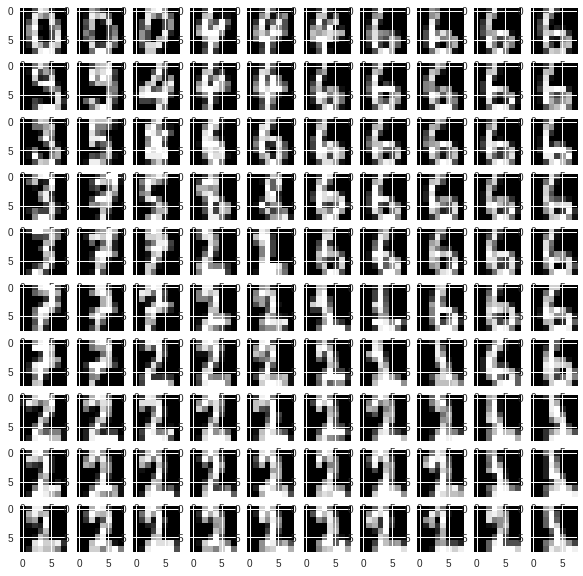

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
f, axarr = plt.subplots(N, N)

for i in xrange(N):
    for j in xrange(N):
        axarr[i,j].imshow(xs[int(idx_mat[i,j])].reshape((8,8)),cmap='gray', interpolation='nearest')
f.set_size_inches(10,10)